In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

"""
More info about the attributes in the dataset:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
"""


X_original, y_original = load_breast_cancer(return_X_y=True)
y_original[y_original==0] = -1
print("data shapes:", X_original.shape, y_original.shape)

# return_X_y=True is an easy option here if you just want to quickly apply ML algorithms
# with return_X_y=False, a pandas dataframe is returned instead
# in this dataframe there is more information about the data, for example the feature names:
bc_pandas_frame = load_breast_cancer(return_X_y=False)
print("\nfeature names:")
for ii in range(X_original.shape[1]):
    print(ii, bc_pandas_frame.feature_names[ii])

# divide into training and testing
np.random.seed(7)
order = np.random.permutation(len(y_original))
tr = np.sort(order[:250])
tst = np.sort(order[250:])

from collections import Counter
print("\nClasses in training:", Counter(y_original[tr]))
print("Classes in testing:", Counter(y_original[tst]))
print("Majority vote accuracy:", np.round(100*accuracy_score(y_original[tst],
                                                             np.sign(np.sum(y_original[tr]))*np.ones(len(tst))), 2))


data shapes: (569, 30) (569,)

feature names:
0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension

Classes in training: Counter({1: 169, -1: 81})
Classes in testing: Counter({1: 188, -1: 131})
Majority vote accuracy: 58.93


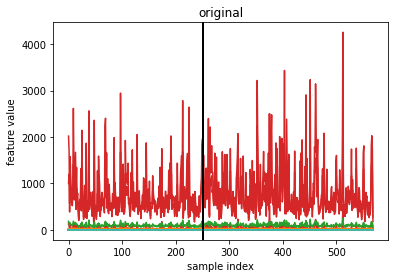

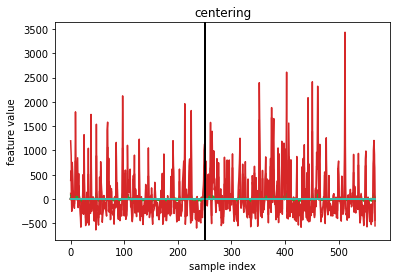

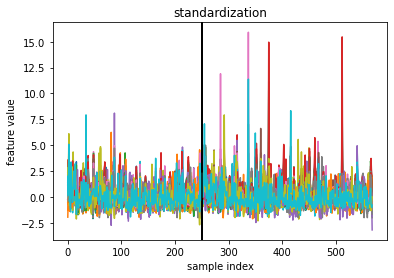

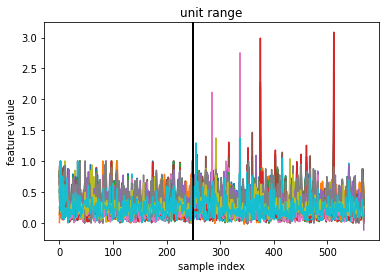

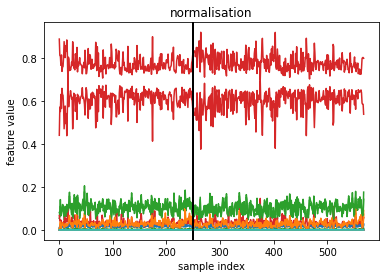

In [17]:
for ii in range(5):
    X = np.copy(X_original) 
    y = np.copy(y_original)
    titlestr = "original"
    # ---------------------------
    # ----- centering -----------
    if ii == 1:
        trmean = np.mean(X[tr, :], axis=0)
        X = X - trmean [np.newaxis, :] # mean over axis=0 returns mean of each column
        titlestr = "centering"
    # ----- standardisation -----
    elif ii == 2:
        trmean = np.mean(X[tr, :], axis=0)
        trvar = np.var(X[tr, :], axis=0)
        X = (X - trmean[np.newaxis, :]) / np.sqrt(trvar)[np.newaxis, :]
        titlestr = "standardization"
    # ----- unit range ----------
    elif ii == 3:
        trmax = np.max(X[tr, :], axis=0)
        trmin = np.min(X[tr, :], axis=0)
        X = (X - trmin[np.newaxis, :]) / (trmax - trmin)[np.newaxis, :]
        titlestr = "unit range"
    # ----- normalization -------
    elif ii == 4:
        X = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
        titlestr = "normalisation"
    # ----------------------------
    # lasso classification

    plt.figure()
    for ii in range (X.shape[1]):
        # features ordered: first training, then testing
        plt.plot(np.arange(X.shape[0]), np.append(X[tr, :][:, ii], X[tst, :][:, ii]))
        plt.axvline(x=len (tr), c="k")
        plt.title(titlestr)
    plt.xlabel("sample index")
    plt.ylabel("feature value")
    plt.show()
exit(":)")

**************************************************
50 parameters for Lasso

parameters for lasso:
[1.00000000e-06 1.38949549e-06 1.93069773e-06 2.68269580e-06
 3.72759372e-06 5.17947468e-06 7.19685673e-06 1.00000000e-05
 1.38949549e-05 1.93069773e-05 2.68269580e-05 3.72759372e-05
 5.17947468e-05 7.19685673e-05 1.00000000e-04 1.38949549e-04
 1.93069773e-04 2.68269580e-04 3.72759372e-04 5.17947468e-04
 7.19685673e-04 1.00000000e-03 1.38949549e-03 1.93069773e-03
 2.68269580e-03 3.72759372e-03 5.17947468e-03 7.19685673e-03
 1.00000000e-02 1.38949549e-02 1.93069773e-02 2.68269580e-02
 3.72759372e-02 5.17947468e-02 7.19685673e-02 1.00000000e-01
 1.38949549e-01 1.93069773e-01 2.68269580e-01 3.72759372e-01
 5.17947468e-01 7.19685673e-01 1.00000000e+00 1.38949549e+00
 1.93069773e+00 2.68269580e+00 3.72759372e+00 5.17947468e+00
 7.19685673e+00 1.00000000e+01]

original

originalaccuracy with 1 feature: 87.7742946708464
original over 90%:  5
original over 95%: -

centering

centeringaccuracy with

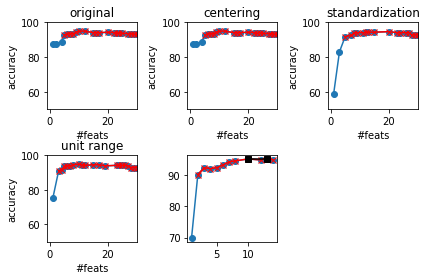

In [23]:
for n_lassoparams in [50]: # [50, 100, 250, 500, 1000, 5000, 10000]: 
    print("*"*50)
    print(n_lassoparams, "parameters for Lasso")
    params = np.logspace(-6, 1, n_lassoparams, endpoint=True)
    print("\nparameters for lasso:")
    print(params)

    #============================================================

    plt.figure()
    
    for ii in range(5):
        X = np.copy(X_original) 
        y = np.copy(y_original) 
        titlestr = "original"
        # ----- centering --------------
        if ii == 1: 
            trmean = np.mean(X[tr, :], axis=0) # mean over axis=0 returns mean of each column
            X = X - trmean[np.newaxis:]
            titlestr = "centering"
        
        # ----- standardization --------
        elif ii == 2:
            trmean = np.mean(X[tr, :], axis=0)
            trvar = np.var (X[tr, :], axis=0)
            X = (X - trmean [np.newaxis, ]) / np.sqrt(trvar) [np.newaxis, :]
            titlestr = "standardization"
        
        # ----- unit range --------------
        elif ii == 3:
            trmax = np.max(X[tr, :], axis=0)
            trmin = np.min(X[tr, :], axis=0)
            X = (X - trmin [np.newaxis, :]) / (trmax - trmin) [np.newaxis, :]
            titlestr = "unit range"

        #------ normalization -----------
        elif ii == 4:
            X = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
            titlestr = "normalisation"

        # -----------------------------
        # lasso classification
        print()
        print(titlestr)

        accs = []
        n_feats = []
        # go through all the parames that are chosen to be investigated
        for param in params:
            # fit the Lasso model, obtain predictions on test set
            lasso = Lasso(alpha=param, tol=1e-3, max_iter=1e5)
            lasso.fit(X[tr, :], y[tr])
            preds = lasso.predict(X[tst, :])
            #count how many features are selected; we are not interested in the case when none were selected 
            if np.count_nonzero(lasso.coef_) > 0:
                theacc = accuracy_score(y[tst], np.sign(preds)) 
                number_of_feats = np.count_nonzero(lasso.coef_)
                # if there are multiple results with same sparsity (number of features), consider only the highest 
                if number_of_feats not in n_feats:
                    accs.append(theacc)
                    n_feats.append(number_of_feats)
                else:
                    nfeat_indx = np.where(np.array(n_feats) == number_of_feats)[0][0]
                    if accs[nfeat_indx] < theacc:
                        accs[nfeat_indx] = theacc
        accs = np.array(accs) * 100
        n_feats = np.array(n_feats)


        # sort for plotting 
        order = np.argsort(n_feats) 
        n_feats = n_feats [order] 
        accs = accs[order]
        
        print()
        
        plt.subplot(231 + ii)
        # plot sparsity vs accuracy 
        plt.plot(n_feats, accs, marker='o')
        
        # print accuracy with one feature:
        print(titlestr+"accuracy with "+str(np.min(n_feats))+" feature:", accs[np.argmin (n_feats)])
        # check with how many features over 90% accuracy is obtained 
        inds = np.where(accs > 90) [0]
        if len(inds) > 0:
            # highlight with red accuracies over 90 in the plot 
            plt.plot(n_feats [inds], accs[inds], c="r", marker='x') 
            print(titlestr + " over 90%: ", np.min(n_feats [inds]))
        else:
            print(titlestr + " over 90%: -")
        # same for 95% accuracy (not asked about in the exercise) 
        inds = np.where (accs > 95)[0]
        if len(inds) > 0:
            plt.plot(n_feats [inds], accs [inds], c="k", marker='s') 
            print(titlestr + " over 95%: ", np.min(n_feats [inds]))
        else:
            print(titlestr + " over 95%: -")

            plt.xlabel("#feats")
            plt.ylabel("accuracy")
            plt.ylim ((50, 100))
            plt.xlim((-1, 30))
            plt.tight_layout()
            plt.title(titlestr)
    try:
        plt.savefig("fig/bcw_tr_"+str(n_lassoparams)+".png")
    except:
        pass

plt.show()
